# **Práctica 2: Sensado y análisis de video**

### Ciencia de Datos para Sensores Inteligentes/Tópicos Selectos en Sistemas Interactivos

*Estudiante: Cielo Aholiva Higuera Gutiérrez*

El proposito de este notebook es recolectar videos sobre la evaluación automática de la FMA-UE

**Dataset**

Librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install mediapipe opencv-python --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.4 MB/s eta 0:00:00


In [4]:
# system libraries
import os
import sys
import re

# data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# video
import mediapipe as mp
import cv2
from IPython.display import Video


In [5]:
video_path = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Videos"

Segmentación

Primer fotograma leído correctamente.


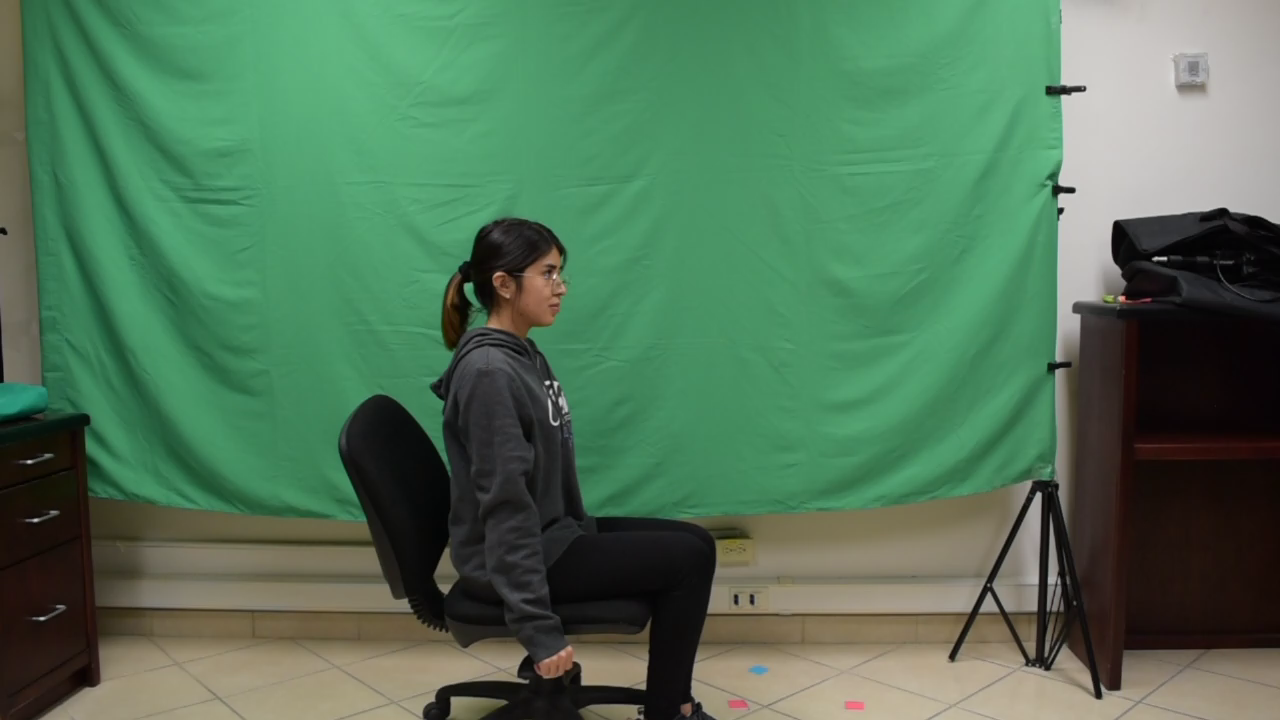

In [ ]:
video_ejemplo = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Videos/Cielo/Cielo_01-Complete.MOV"

cap = cv2.VideoCapture(video_ejemplo)

if not cap.isOpened():
    print("Error al abrir el video.")
else:
    ret, frame = cap.read()
    if ret:
        print("Primer fotograma leído correctamente.")
        cv2_imshow(frame)
    else:
        print("No se pudo leer el primer fotograma.")

cap.release()

In [ ]:
cap = cv2.VideoCapture(video_ejemplo)

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    if frame_count % 10 == 0:  # Mostrar cada 10 fotogramas
        cv2_imshow(frame)

cap.release()
print(f"Total de fotogramas leídos: {frame_count}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Inicializar MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Función para extraer los landmarks del cuerpo en un video
def obtener_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir el fotograma a RGB (MediaPipe usa RGB, OpenCV usa BGR)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detectar los landmarks
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            for landmark in results.pose_landmarks.landmark:
                print(f"x: {landmark.x}, y: {landmark.y}, z: {landmark.z}")

        # Mostrar el fotograma con los landmarks
        mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        from google.colab.patches import cv2_imshow
        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Ruta del video
video_path = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Videos/Nacho/Nacho_01-Complete.MOV"
obtener_landmarks(video_path)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
from pathlib import Path

In [13]:
# Rutas
VIDEO_DIR = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Videos"
OUTPUT_DIR = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV"

# Inicializar MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

def process_video(video_path, output_csv):
    cap = cv2.VideoCapture(video_path)
    data = []

    frame_id = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir imagen a RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            landmarks = []
            for lm in results.pose_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z, lm.visibility])
            data.append([frame_id] + landmarks)

        frame_id += 1

    cap.release()

    # Guardar en CSV
    if data:
        columns = ["frame"] + [f"{name}_{axis}" for name in range(33) for axis in ["x", "y", "z", "visibility"]]
        df = pd.DataFrame(data, columns=columns)
        df.to_csv(output_csv, index=False)
        print(f"Guardado: {output_csv}")
    else:
        print(f"Advertencia: No se detectaron landmarks en {video_path}")

# Procesar todos los videos en la carpeta
for student_folder in os.listdir(VIDEO_DIR):
    student_path = os.path.join(VIDEO_DIR, student_folder)
    if os.path.isdir(student_path):
        for video_file in os.listdir(student_path):
            if video_file.endswith(".MOV"):
                video_path = os.path.join(student_path, video_file)
                csv_name = video_file.replace(".MOV", ".csv")
                output_csv = os.path.join(OUTPUT_DIR, csv_name)
                process_video(video_path, output_csv)

print("Procesamiento completado.")

Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_01-Incomplete.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_01-Complete.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_01-Null.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_02-Incomplete.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_03-Null.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_03-Incomplete.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_03-Complete.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_02-Complete.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_02-Null.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV/Luis_04-Null.csv
Guardado: /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_C

In [14]:
# Directorio donde están los CSV generados
CSV_DIR = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Landmarks_CSV"
OUTPUT_CSV = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Dataset.csv"

all_data = []
for file in os.listdir(CSV_DIR):
    if file.endswith(".csv"):
        label = "Complete" if "Complete" in file else "Incomplete" if "Incomplete" in file else "Null"
        df = pd.read_csv(os.path.join(CSV_DIR, file))
        df["label"] = label
        df["video"] = file
        all_data.append(df)

# Concatenar todos los CSVs en un DataFrame único
df_all = pd.concat(all_data, ignore_index=True)
df_all.to_csv(OUTPUT_CSV, index=False)
print(f"Dataset guardado en {OUTPUT_CSV}")

Dataset guardado en /content/drive/MyDrive/CDSI/Notebooks/Practica 2/Dataset.csv


In [15]:
def compute_distance(row, p1, p2):
    """ Calcula la distancia euclidiana entre dos landmarks. """
    x1, y1 = row[f"{p1}_x"], row[f"{p1}_y"]
    x2, y2 = row[f"{p2}_x"], row[f"{p2}_y"]
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

df_all["shoulder_distance"] = df_all.apply(lambda row: compute_distance(row, 11, 12), axis=1)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seleccionar características
features = df_all.drop(columns=["frame", "label", "video"])
labels = df_all["label"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Entrenar modelo
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")

Precisión del modelo: 0.97


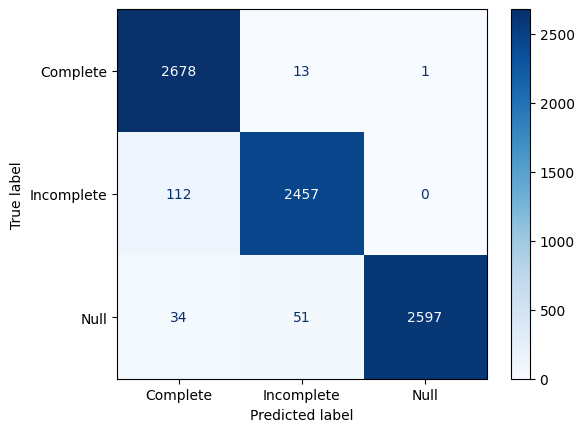

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")

In [20]:
results = pd.DataFrame({
    "Real": y_test,
    "Predicción": y_pred
})

# Filtrar los casos en los que el modelo se equivocó
wrong_predictions = results[results["Real"] != results["Predicción"]]

# Mostrar los primeros casos donde el modelo se equivocó
print("Casos en los que el modelo se equivocó:")
print(wrong_predictions.head())

Casos en los que el modelo se equivocó:
             Real  Predicción
31906        Null  Incomplete
12978        Null    Complete
35061        Null    Complete
21121        Null  Incomplete
16898  Incomplete    Complete


In [21]:
wrong_predictions["Video"] = df_all.loc[wrong_predictions.index, "video"]
wrong_predictions["Frame"] = df_all.loc[wrong_predictions.index, "frame"]
print(wrong_predictions[["Video", "Frame", "Real", "Predicción"]])

                          Video  Frame        Real  Predicción
31906         Cielo_03-Null.csv     31        Null  Incomplete
12978        Miguel_03-Null.csv      0        Null    Complete
35061         Nacho_05-Null.csv     99        Null    Complete
21121           Jesus_01-01.csv    136        Null  Incomplete
16898  Ariana_05-Incomplete.csv    236  Incomplete    Complete
...                         ...    ...         ...         ...
775            Luis_01-Null.csv     25        Null  Incomplete
6754          David_05-Null.csv      4        Null  Incomplete
12104        Miguel_05-Null.csv      8        Null    Complete
26196   Mario_02-Incomplete.csv      0  Incomplete    Complete
31917         Cielo_03-Null.csv     42        Null  Incomplete

[211 rows x 4 columns]


<ipython-input-21-d9f4bcf899e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_predictions["Video"] = df_all.loc[wrong_predictions.index, "video"]
<ipython-input-21-d9f4bcf899e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_predictions["Frame"] = df_all.loc[wrong_predictions.index, "frame"]


In [29]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

# Función para procesar el video y obtener los landmarks
def extract_landmarks_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    data = []

    frame_id = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir imagen a RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            landmarks = []
            for lm in results.pose_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z, lm.visibility])
            data.append([frame_id] + landmarks)

        frame_id += 1

    cap.release()

    # Promediar los landmarks de todos los frames
    if data:
        df = pd.DataFrame(data)
        landmarks_avg = df.iloc[:, 1:].mean(axis=0)
        return landmarks_avg
    else:
        return None

# Cargar el modelo entrenado
from sklearn.ensemble import RandomForestClassifier
import joblib

features = df_all.drop(columns=["frame", "label", "video"])
labels = df_all["label"]

# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(features, labels)

# Tomar las columnas del conjunto de entrenamiento
columns_train = features.columns

video_path = "/content/drive/MyDrive/CDSI/Notebooks/Practica 2/Videos/Cielo/Cielo_01-Complete.MOV"

# Extraer landmarks del video
landmarks_new_video = extract_landmarks_from_video(video_path)

if landmarks_new_video is not None:
    landmarks_new_video = pd.Series(landmarks_new_video, index=columns_train)

    input_data = landmarks_new_video.values.reshape(1, -1)

    # Predecir usando el modelo entrenado
    prediction = clf.predict(input_data)
    print(f"El video ha sido calificado como: {prediction[0]}")
else:
    print("No se pudieron extraer landmarks del video.")

El video ha sido calificado como: Incomplete


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
